# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

588

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:


city_df = pd.DataFrame({"cities": cities})
city_df["temp(f)"] = 0.0
city_df["latitude"] = 0.0
city_df["longitude"] = 0.0
city_df["humidity"] = 0.0
city_df["cloudiness"] = 0.0
city_df["wind_speed"] = 0.0
city_df.head(10)

,cities,temp(f),latitude,longitude,humidity,cloudiness,wind_speed
0,leningradskiy,0.0,0.0,0.0,0.0,0.0,0.0
1,dikson,0.0,0.0,0.0,0.0,0.0,0.0
2,constantine,0.0,0.0,0.0,0.0,0.0,0.0
3,butaritari,0.0,0.0,0.0,0.0,0.0,0.0
4,thompson,0.0,0.0,0.0,0.0,0.0,0.0
5,hobart,0.0,0.0,0.0,0.0,0.0,0.0
6,soyo,0.0,0.0,0.0,0.0,0.0,0.0
7,port alfred,0.0,0.0,0.0,0.0,0.0,0.0
8,new norfolk,0.0,0.0,0.0,0.0,0.0,0.0
9,qaanaaq,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
units = "imperial"
testcity = "chicago"
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + testcity).json()
response['wind']['speed']


3

In [90]:
# use iterrows to iterate through pandas dataframe
missing_cities = 0
for index, row in city_df.iterrows():
    city = row['cities']
    # query the city and convert to json
    response = requests.get(query_url + city).json()
    #a ppend the weather data to the appropriate column/row
    # print(response)
    try:
        city_df.loc[index, "wind_speed"]=response['wind']['speed']
        city_df.loc[index, "cloudiness"]=response['clouds']['all']
        city_df.loc[index, "latitude"]=response['coord']['lat']
        city_df.loc[index, "longitude"]=response['coord']['lon']
        city_df.loc[index, "temp(f)"]=response['main']['temp']
        city_df.loc[index, "humidity"]=response['main']['humidity']
        print(f"{index}: {city} processed")
    except (KeyError, IndexError):
        missing_cities = missing_cities + 1
        print(f"Can't find #{index}.... skipping. Total missing cities: {missing_cities}.")
        
 
print(f"Total missing cities: {missing_cities}")        

0: leningradskiy processed
1: dikson processed
2: constantine processed
3: butaritari processed
4: thompson processed
5: hobart processed
6: soyo processed
7: port alfred processed
8: new norfolk processed
9: qaanaaq processed
10: cherskiy processed
11: hermanus processed
12: vaini processed
Missing field ... skipping. Total missing cities: 1.
14: santo antonio do ica processed
15: khatanga processed
16: mataura processed
17: cape town processed
Missing field ... skipping. Total missing cities: 2.
19: barrow processed
Missing field ... skipping. Total missing cities: 3.
21: tasiilaq processed
22: bredasdorp processed
23: laukaa processed
24: san luis processed
25: yellowknife processed
26: kuybysheve processed
27: halifax processed
28: ko samui processed
29: bluff processed
30: saint-philippe processed
31: busselton processed
32: constitucion processed
33: bethel processed
Missing field ... skipping. Total missing cities: 4.
35: rawson processed
36: burns lake processed
37: los llanos 

299: waipawa processed
300: buala processed
Missing field ... skipping. Total missing cities: 33.
302: flinders processed
303: venice processed
304: kamenka processed
305: srednekolymsk processed
306: ulety processed
307: biak processed
308: port-gentil processed
309: alice springs processed
310: makaryev processed
311: homer processed
312: prado processed
313: christchurch processed
314: kpalime processed
315: sumbe processed
316: yeppoon processed
317: itarema processed
318: lorengau processed
319: pangkalanbuun processed
320: bam processed
321: kanaya processed
322: aklavik processed
323: port macquarie processed
324: cobija processed
325: belaya gora processed
326: dingle processed
327: abu kamal processed
328: ulladulla processed
329: moerai processed
Missing field ... skipping. Total missing cities: 34.
331: huanren processed
332: maragogi processed
333: suntar processed
334: marrakesh processed
335: biryusinsk processed
336: veraval processed
337: necochea processed
338: ostrovn

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame
city_df.head()

In [18]:
city_df.to_csv("../output_data/city_weather.csv", index=True, header=True)
city_df.head()

,cities,temp(f),latitude,longitude,humidity,cloudiness,wind_speed
0,leningradskiy,35.28,69.3833,178.4167,93.0,99.0,13.60
1,dikson,40.60,73.5069,80.5464,99.0,100.0,1.70
2,constantine,90.81,36.3650,6.6147,33.0,75.0,14.97
3,butaritari,83.19,3.0707,172.7902,70.0,36.0,9.73
4,thompson,48.36,55.7435,-97.8558,93.0,20.0,0.00


In [19]:
city_df.dtypes

cities         object
temp(f)       float64
latitude      float64
longitude     float64
humidity      float64
cloudiness    float64
wind_speed    float64
dtype: object

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [32]:
city_df.index[city_df['temp(f)']==0].tolist()
# city_df.index[city_df['humidity']>100].tolist()
# nothing was returned, so no cities have >100% humidity RIGHT NOW
#len(city_df)

[13,
 18,
 20,
 34,
 43,
 54,
 63,
 84,
 94,
 100,
 124,
 128,
 134,
 147,
 150,
 173,
 187,
 195,
 196,
 199,
 211,
 216,
 220,
 226,
 239,
 247,
 249,
 254,
 260,
 281,
 282,
 294,
 301,
 330,
 339,
 350,
 368,
 370,
 400,
 403,
 424,
 436,
 443,
 447,
 460,
 474,
 500,
 518,
 520,
 530,
 532,
 538,
 547,
 556,
 567,
 570,
 579,
 585]

In [33]:
#  Get the indices of cities that have humidity over 100%. Right now there are none
humidity_err = city_df.index[city_df['temp(f)']==0].tolist()
len(humidity_err)

58

In [34]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_df.drop(index=humidity_err, inplace=False)
len(clean_city_data)

530

In [35]:

clean_city_data.head()

,cities,temp(f),latitude,longitude,humidity,cloudiness,wind_speed
0,leningradskiy,35.28,69.3833,178.4167,93.0,99.0,13.60
1,dikson,40.60,73.5069,80.5464,99.0,100.0,1.70
2,constantine,90.81,36.3650,6.6147,33.0,75.0,14.97
3,butaritari,83.19,3.0707,172.7902,70.0,36.0,9.73
4,thompson,48.36,55.7435,-97.8558,93.0,20.0,0.00


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

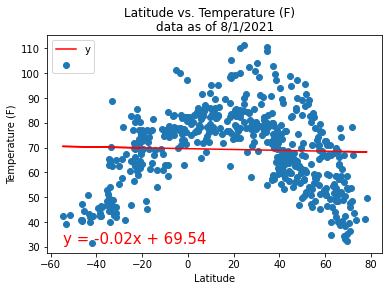

The correlation between Latitude and Temperature (F) is (-0.03659263736647639, 0.4005057367910128)
The regression equation is y = -0.02x + 69.54. 
The r-squared is: 0.0013390211094344434 with a p value of 0.40050573679085033.


In [95]:
x_values = clean_city_data["latitude"]
y_values= clean_city_data["temp(f)"]
correlation = st.pearsonr(x_values, y_values)
x_label = "Latitude"
y_label = "Temperature (F)"

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = ("y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
min_x = x_values.min()
min_y = y_values.min()
plt.annotate(line_eq,(min_x,min_y),fontsize=15,color="red")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title('data as of 8/1/2021')
plt.suptitle(f'{x_label} vs. {y_label}')
plt.legend(line_eq, loc = "upper left")
plt.savefig(f"../output_data/{x_label}_{y_label}.png")
plt.show()
print(f"The correlation between {x_label} and {y_label} is {correlation}")
print(f"The regression equation is {line_eq}. ")
print(f"The r-squared is: {rvalue**2} with a p value of {pvalue}.")



## Latitude vs. Humidity Plot

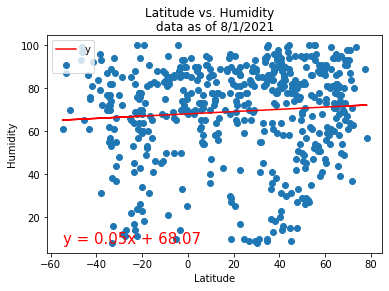

The correlation between Latitude and Humidity is (0.07885045176651834, 0.069706576718599)
The regression equation is y = 0.05x + 68.07. 
The r-squared is: 0.0062173937437840394 with a p value of 0.06970657671857085.


In [96]:
x_values = clean_city_data["latitude"]
y_values= clean_city_data["humidity"]
correlation = st.pearsonr(x_values, y_values)
x_label = "Latitude"
y_label = "Humidity"

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = ("y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
min_x = x_values.min()
min_y = y_values.min()
plt.annotate(line_eq,(min_x,min_y),fontsize=15,color="red")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title('data as of 8/1/2021')
plt.suptitle(f'{x_label} vs. {y_label}')
plt.legend(line_eq, loc = "upper left")
plt.savefig(f"../output_data/{x_label}_{y_label}.png")
plt.show()
print(f"The correlation between {x_label} and {y_label} is {correlation}")
print(f"The regression equation is {line_eq}. ")
print(f"The r-squared is: {rvalue**2} with a p value of {pvalue}.")


## Latitude vs. Cloudiness Plot

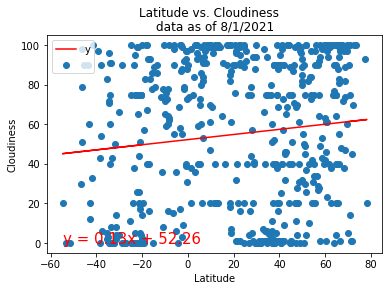

The correlation between Latitude and Cloudiness is (0.1177074740133768, 0.006670367662198577)
The regression equation is y = 0.13x + 52.26. 
The r-squared is: 0.01385504943860977 with a p value of 0.006670367662195922.


In [97]:
x_values = clean_city_data["latitude"]
y_values= clean_city_data["cloudiness"]
correlation = st.pearsonr(x_values, y_values)
x_label = "Latitude"
y_label = "Cloudiness"

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = ("y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
min_x = x_values.min()
min_y = y_values.min()
plt.annotate(line_eq,(min_x,min_y),fontsize=15,color="red")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title('data as of 8/1/2021')
plt.suptitle(f'{x_label} vs. {y_label}')
plt.legend(line_eq, loc = "upper left")
plt.savefig(f"../output_data/{x_label}_{y_label}.png")
plt.show()
print(f"The correlation between {x_label} and {y_label} is {correlation}")
print(f"The regression equation is {line_eq}. ")
print(f"The r-squared is: {rvalue**2} with a p value of {pvalue}.")

## Latitude vs. Wind Speed Plot

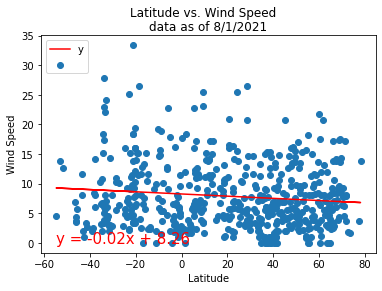

The correlation between Latitude and Wind Speed is (-0.11122213099508901, 0.010394110046698345)
The regression equation is y = -0.02x + 8.26. 
The r-squared is: 0.012370362423088725 with a p value of 0.010394110046694126.


In [98]:
x_values = clean_city_data["latitude"]
y_values= clean_city_data["wind_speed"]
correlation = st.pearsonr(x_values, y_values)
x_label = "Latitude"
y_label = "Wind Speed"

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = ("y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
min_x = x_values.min()
min_y = y_values.min()
plt.annotate(line_eq,(min_x,min_y),fontsize=15,color="red")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title('data as of 8/1/2021')
plt.suptitle(f'{x_label} vs. {y_label}')
plt.legend(line_eq, loc = "upper left")
plt.savefig(f"../output_data/{x_label}_{y_label}.png")
plt.show()
print(f"The correlation between {x_label} and {y_label} is {correlation}")
print(f"The regression equation is {line_eq}. ")
print(f"The r-squared is: {rvalue**2} with a p value of {pvalue}.")

## Linear Regression

In [55]:
# create northern hemisphere data
#  Get the indices of cities that have humidity over 100%. Right now there are none
drop_shemisphere = clean_city_data.index[clean_city_data['latitude']<0].tolist()
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
northern_data = clean_city_data.drop(index=drop_shemisphere, inplace=False)
len(northern_data)

366

In [56]:
northern_data.head()

,cities,temp(f),latitude,longitude,humidity,cloudiness,wind_speed
0,leningradskiy,35.28,69.3833,178.4167,93.0,99.0,13.60
1,dikson,40.60,73.5069,80.5464,99.0,100.0,1.70
2,constantine,90.81,36.3650,6.6147,33.0,75.0,14.97
3,butaritari,83.19,3.0707,172.7902,70.0,36.0,9.73
4,thompson,48.36,55.7435,-97.8558,93.0,20.0,0.00


In [57]:
# create southern hemisphere data
#  Get the indices of cities that have lat >= 0 (north).
drop_nhemisphere = clean_city_data.index[clean_city_data['latitude']>=0].tolist()
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
southern_data = clean_city_data.drop(index=drop_nhemisphere, inplace=False)
len(southern_data)

164

In [58]:
southern_data.head()

,cities,temp(f),latitude,longitude,humidity,cloudiness,wind_speed
5,hobart,41.90,-42.8794,147.3294,75.0,20.0,1.99
6,soyo,75.25,-6.1349,12.3689,66.0,55.0,9.15
7,port alfred,70.34,-33.5906,26.8910,53.0,91.0,22.17
8,new norfolk,39.97,-42.7826,147.0587,76.0,12.0,1.01
11,hermanus,62.80,-34.4187,19.2345,72.0,71.0,15.14


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

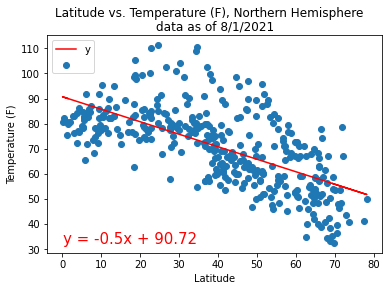

The correlation between Latitude and Temperature (F) is (-0.6467355471102738, 9.737798824350677e-45)
The regression equation is y = -0.5x + 90.72. 
The r-squared is: 0.4182668678960252 with a p value of 9.737798824350742e-45.


In [81]:
x_values = northern_data["latitude"]
y_values= northern_data["temp(f)"]
correlation = st.pearsonr(x_values, y_values)
x_label = "Latitude"
y_label = "Temperature (F)"
hemi = "Northern"
# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = ("y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
min_x = x_values.min()
min_y = y_values.min()
plt.annotate(line_eq,(min_x,min_y),fontsize=15,color="red")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title('data as of 8/1/2021')
plt.suptitle(f'{x_label} vs. {y_label}, Northern Hemisphere')
plt.legend(line_eq, loc = "upper left")
plt.savefig(f"../output_data/{hemi}_{x_label}_{y_label}.png")
plt.show()
print(f"The correlation between {x_label} and {y_label} is {correlation}")
print(f"The regression equation is {line_eq}. ")
print(f"The r-squared is: {rvalue**2} with a p value of {pvalue}.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

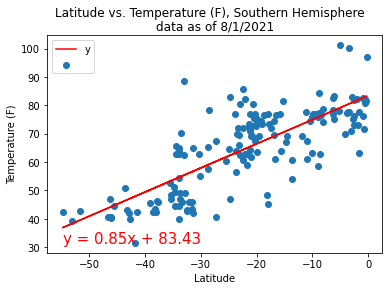

The correlation between Latitude and Temperature (F) is (0.7743466159454284, 5.090160318787462e-34)
The regression equation is y = 0.85x + 83.43. 
The r-squared is: 0.5996126816261365 with a p value of 5.090160318787808e-34.


In [82]:
x_values = southern_data["latitude"]
y_values= southern_data["temp(f)"]
correlation = st.pearsonr(x_values, y_values)
x_label = "Latitude"
y_label = "Temperature (F)"
hemi = "Southern"
# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = ("y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
min_x = x_values.min()
min_y = y_values.min()
plt.annotate(line_eq,(min_x,min_y),fontsize=15,color="red")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title('data as of 8/1/2021')
plt.suptitle(f'{x_label} vs. {y_label}, Southern Hemisphere')
plt.legend(line_eq, loc = "upper left")
plt.savefig(f"../output_data/{hemi}_{x_label}_{y_label}.png")
plt.show()
print(f"The correlation between {x_label} and {y_label} is {correlation}")
print(f"The regression equation is {line_eq}. ")
print(f"The r-squared is: {rvalue**2} with a p value of {pvalue}.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

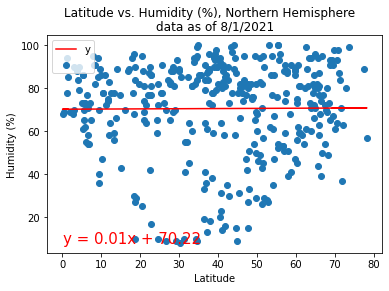

The correlation between Latitude and Humidity (%) is (0.007060185019144282, 0.8929210717857196)
The regression equation is y = 0.01x + 70.22. 
The r-squared is: 4.984621250454955e-05 with a p value of 0.8929210717857681.


In [83]:
x_values = northern_data["latitude"]
y_values= northern_data["humidity"]
correlation = st.pearsonr(x_values, y_values)
x_label = "Latitude"
y_label = "Humidity (%)"
hemi = "Northern"
# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = ("y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
min_x = x_values.min()
min_y = y_values.min()
plt.annotate(line_eq,(min_x,min_y),fontsize=15,color="red")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title('data as of 8/1/2021')
plt.suptitle(f'{x_label} vs. {y_label}, Northern Hemisphere')
plt.legend(line_eq, loc = "upper left")
plt.savefig(f"../output_data/{hemi}_{x_label}_{y_label}.png")
plt.show()
print(f"The correlation between {x_label} and {y_label} is {correlation}")
print(f"The regression equation is {line_eq}. ")
print(f"The r-squared is: {rvalue**2} with a p value of {pvalue}.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

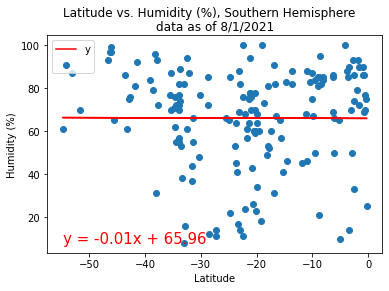

The correlation between Latitude and Humidity (%) is (-0.0039707705149227834, 0.9597542909785663)
The regression equation is y = -0.01x + 65.96. 
The r-squared is: 1.5767018482180118e-05 with a p value of 0.9597542909785688.


In [85]:
x_values = southern_data["latitude"]
y_values= southern_data["humidity"]
correlation = st.pearsonr(x_values, y_values)
x_label = "Latitude"
y_label = "Humidity (%)"
hemi = "Southern"
# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = ("y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
min_x = x_values.min()
min_y = y_values.min()
plt.annotate(line_eq,(min_x,min_y),fontsize=15,color="red")
plt.legend(line_eq, loc = "upper left")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title('data as of 8/1/2021')
plt.suptitle(f'{x_label} vs. {y_label}, Southern Hemisphere')
plt.savefig(f"../output_data/{hemi}_{x_label}_{y_label}.png")
plt.show()
print(f"The correlation between {x_label} and {y_label} is {correlation}")
print(f"The regression equation is {line_eq}. ")
print(f"The r-squared is: {rvalue**2} with a p value of {pvalue}.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

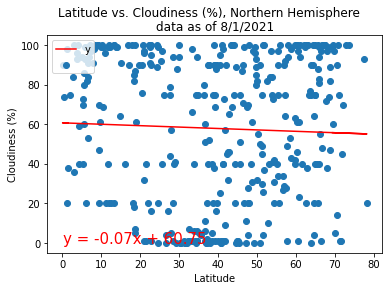

The correlation between Latitude and Cloudiness (%) is (-0.03925439005225238, 0.4540377722111207)
The regression equation is y = -0.07x + 60.75. 
The r-squared is: 0.0015409071383743714 with a p value of 0.4540377722111424.


In [86]:
x_values = northern_data["latitude"]
y_values= northern_data["cloudiness"]
correlation = st.pearsonr(x_values, y_values)
x_label = "Latitude"
y_label = "Cloudiness (%)"
hemi = "Northern"
# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = ("y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
min_x = x_values.min()
min_y = y_values.min()
plt.annotate(line_eq,(min_x,min_y),fontsize=15,color="red")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title('data as of 8/1/2021')
plt.suptitle(f'{x_label} vs. {y_label}, Northern Hemisphere')
plt.legend(line_eq, loc = "upper left")
plt.savefig(f"../output_data/{hemi}_{x_label}_{y_label}.png")
plt.show()
print(f"The correlation between {x_label} and {y_label} is {correlation}")
print(f"The regression equation is {line_eq}. ")
print(f"The r-squared is: {rvalue**2} with a p value of {pvalue}.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

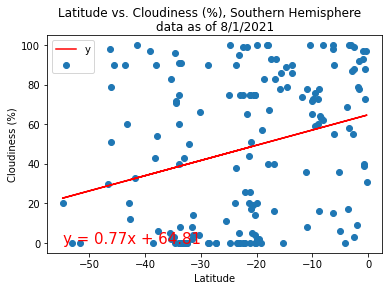

The correlation between Latitude and Cloudiness (%) is (0.2731630038106469, 0.00040166696211652)
The regression equation is y = 0.77x + 64.81. 
The r-squared is: 0.07461802665085546 with a p value of 0.00040166696211652096.


In [87]:
x_values = southern_data["latitude"]
y_values= southern_data["cloudiness"]

correlation = st.pearsonr(x_values, y_values)
x_label = "Latitude"
y_label = "Cloudiness (%)"
hemi = "Northern"
# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = ("y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
min_x = x_values.min()
min_y = y_values.min()
plt.annotate(line_eq,(min_x,min_y),fontsize=15,color="red")
plt.legend(line_eq, loc = "upper left")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title('data as of 8/1/2021')
plt.suptitle(f'{x_label} vs. {y_label}, Southern Hemisphere')
plt.savefig(f"../output_data/{hemi}_{x_label}_{y_label}.png")
plt.show()
print(f"The correlation between {x_label} and {y_label} is {correlation}")
print(f"The regression equation is {line_eq}. ")
print(f"The r-squared is: {rvalue**2} with a p value of {pvalue}.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

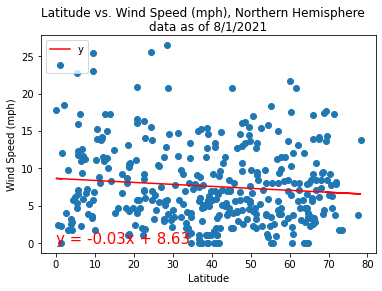

The correlation between Latitude and Wind Speed (mph) is (-0.10102064707993923, 0.0534867401166594)
The regression equation is y = -0.03x + 8.63. 
The r-squared is: 0.010205171136449637 with a p value of 0.05348674011666171.


In [88]:
x_values = northern_data["latitude"]
y_values= northern_data["wind_speed"]

correlation = st.pearsonr(x_values, y_values)
x_label = "Latitude"
y_label = "Wind Speed (mph)"
hemi = "Northern"
# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = ("y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
min_x = x_values.min()
min_y = y_values.min()
plt.annotate(line_eq,(min_x,min_y),fontsize=15,color="red")
plt.legend(line_eq, loc = "upper left")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title('data as of 8/1/2021')
plt.suptitle(f'{x_label} vs. {y_label}, {hemi} Hemisphere')
plt.savefig(f"../output_data/{hemi}_{x_label}_{y_label}.png")
plt.show()
print(f"The correlation between {x_label} and {y_label} is {correlation}")
print(f"The regression equation is {line_eq}. ")
print(f"The r-squared is: {rvalue**2} with a p value of {pvalue}.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

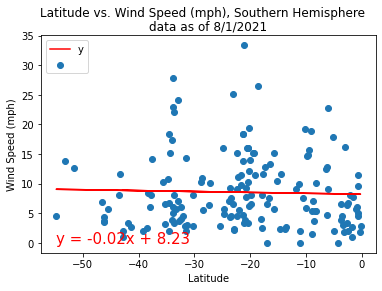

The correlation between Latitude and Wind Speed (mph) is (-0.03231572212449046, 0.6812301345867208)
The regression equation is y = -0.02x + 8.23. 
The r-squared is: 0.0010443058964272848 with a p value of 0.681230134586715.


In [89]:
x_values = southern_data["latitude"]
y_values= southern_data["wind_speed"]

correlation = st.pearsonr(x_values, y_values)
x_label = "Latitude"
y_label = "Wind Speed (mph)"
hemi = "Southern"
# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = ("y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
min_x = x_values.min()
min_y = y_values.min()
plt.annotate(line_eq,(min_x,min_y),fontsize=15,color="red")
plt.legend(line_eq, loc = "upper left")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title('data as of 8/1/2021')
plt.suptitle(f'{x_label} vs. {y_label}, {hemi} Hemisphere')
plt.savefig(f"../output_data/{hemi}_{x_label}_{y_label}.png")
plt.show()
print(f"The correlation between {x_label} and {y_label} is {correlation}")
print(f"The regression equation is {line_eq}. ")
print(f"The r-squared is: {rvalue**2} with a p value of {pvalue}.")